In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


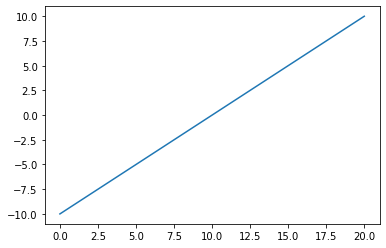

In [2]:
y = [i for i in range(-10, 11)]
print(y)
# y = x
plt.plot(y)
plt.show()

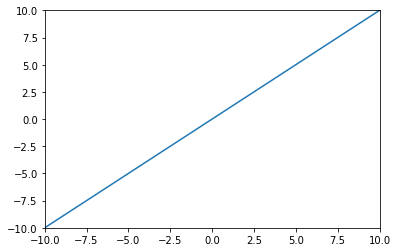

In [3]:
x = [i for i in range(-10, 11)]
y = x
plt.plot(x, y)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

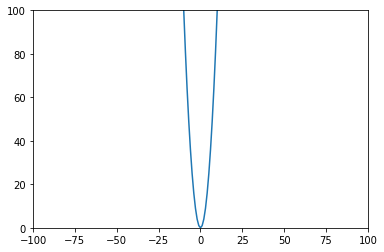

In [4]:
x = [i for i in range(-10, 11)]
y = [t * t for t in x]
# y = x**2
plt.plot(x, y)
plt.xlim(-100, 100)
plt.ylim(0, 100)
plt.show()

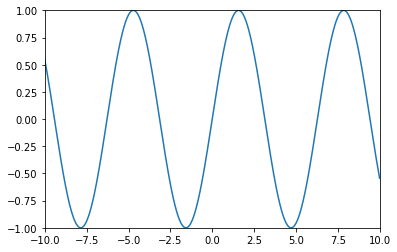

In [5]:
x = [i / 100 for i in range(-1000, 1001)]
y = [math.sin(t) for t in x]
# y = sin(x)
plt.plot(x, y)
plt.xlim(-10, 10)
plt.ylim(-1, 1)
plt.show()

(100, 2)
[[1.         0.00670035]
 [0.00670035 1.        ]]


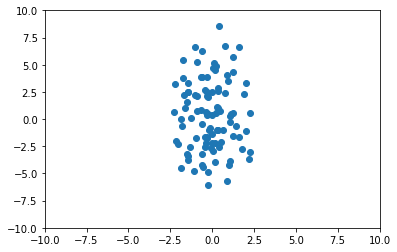

In [6]:
x = np.random.randn(100, 2)
print(x.shape)
print(np.corrcoef(x.T))
plt.scatter(x[:, 0], 3 * x[: , 1])
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

In [7]:
def plot_correlated(func, noise):
    t = np.random.randn(100)
    x = np.stack([
        t,
        func(t)
    ]).T
    x += np.random.randn(100, 2) * noise
    print(np.corrcoef(x.T)[0, 1])
    plt.scatter(x[:, 0], x[:, 1])
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.show()

0.8446098405405394


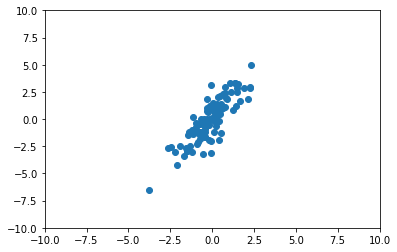

In [8]:
plot_correlated(lambda x: 2 * x, 0.5)

0.8275205421499511


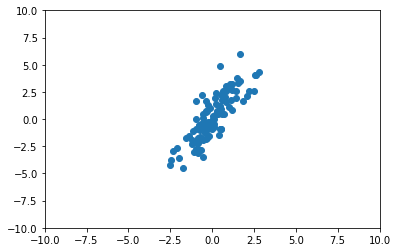

0.9946974831718132


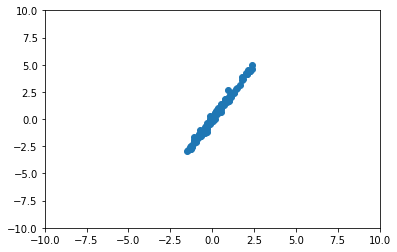

0.08480130459324743


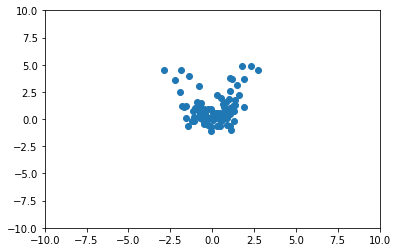

0.6354793574340032


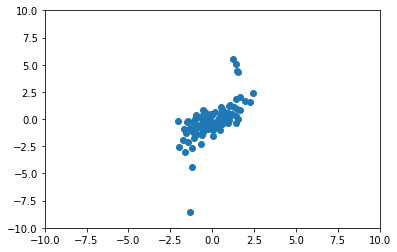

0.8294597909347413


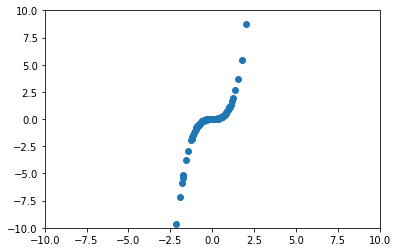

In [9]:
plot_correlated(lambda x: 2 * x, 0.5)
plot_correlated(lambda x: 2 * x, 0.1)
plot_correlated(lambda x: x ** 2, 0.5)
plot_correlated(lambda x: x ** 3, 0.5)
plot_correlated(lambda x: x ** 3, 0.01)

In [10]:
def plot_several(xfuncs, yfuncs, colors, noise):
    for xfunc, yfunc, color in zip(xfuncs, yfuncs, colors):
        t = np.random.randn(100)
        x = np.stack([
            xfunc(t),
            yfunc(t),
        ])
        x += np.random.randn(2, 100) * noise
        plt.scatter(x[0, :], x[1, :], c = color)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.show()

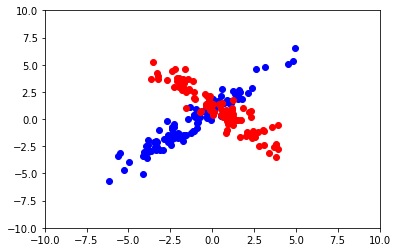

In [11]:
plot_several(
    [
        lambda x: 2 * x - 1.3,
        lambda x: 2 * x + 0.2,
    ],
    [
        lambda x: 2 * x - 0.5,
        lambda x: -2 * x + 1.1,
    ],
    ['blue', 'red'],
    0.5
)

Explained variance: [0.59025664 0.40974336]


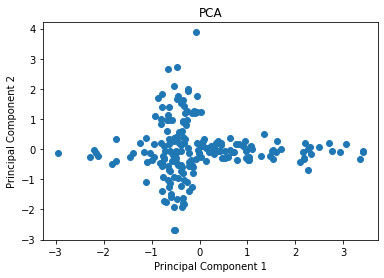

In [12]:
def prepare_data(xfuncs, yfuncs, noise):
    data = []
    for xfunc, yfunc in zip(xfuncs, yfuncs):
        t = np.random.randn(100)
        x = np.stack([
            xfunc(t),
            yfunc(t),
        ])
        x += np.random.randn(2, 100) * noise
        data.append(x)
    return np.concatenate(data, axis = 1)


X = prepare_data(
    [
        lambda x: 2 * x - 1.3,
        lambda x: 2 * x + 0.2,
    ],
    [
        lambda x: 2 * x - 0.5,
        lambda x: -2 * x + 1.1,
    ],
    0.5
)


# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X.T)

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance:", explained_variance)

# Visualization
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA")
plt.show()
